In [2]:
import json
from obspy import Stream, Trace, UTCDateTime
import h5py
import numpy as np
from DataGenerator import DataGenerator
%matplotlib inline

Using TensorFlow backend.


In [65]:
data_path = 'data_tord_may2020'
full_data_csv = 'event_paths.csv'
csv_root = 'csv_folder'
train_csv = f'{csv_root}/train_set.csv'
val_csv = f'{csv_root}/validation_set.csv'
test_csv = f'{csv_root}/test_set.csv'

data_gen = DataGenerator(csv_root, train_csv, val_csv, test_csv)
full_ds = data_gen.load_dataset(full_data_csv)
train_ds = data_gen.load_dataset(train_csv)
val_ds = data_gen.load_dataset(val_csv)
test_ds = data_gen.load_dataset(test_csv)

In [66]:
def get_sample_datapoint(ds):
    return data_gen.path_to_trace(ds[1][0]), ds[1][1]

In [76]:
trace_sample,label = get_sample_datapoint(train_ds)

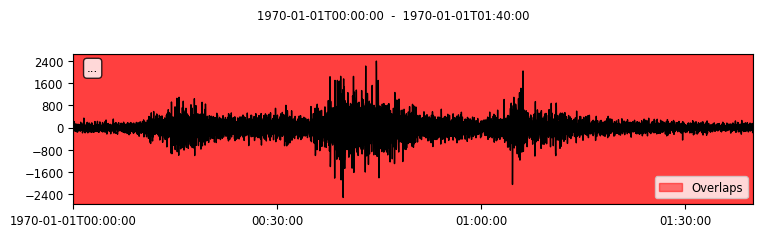

explosions


In [77]:


trace_BHE = Trace(
    data=trace_sample[0]
)

trace_BHN = Trace(
    data=trace_sample[1]
)
trace_BHZ = Trace(
    data=trace_sample[2]
)

# Assemple into a Stream
stream = Stream([trace_BHE, trace_BHN, trace_BHZ])

# Plot it
stream.plot()
print(label)

In [84]:
stream[0][3]

-9.3555364889168342e-07

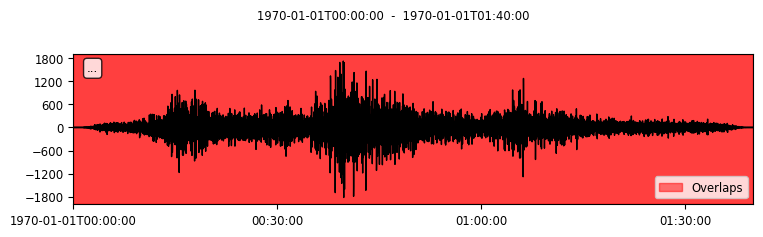

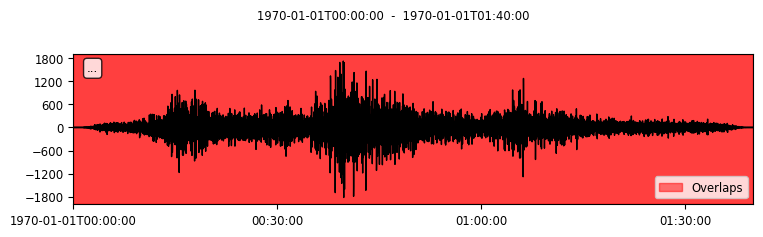

In [81]:
stream.detrend('demean')

# Taper the traces, meaning the ends will go gradually to 0 -- this is required before filtering
stream.taper(max_percentage=0.05, type='cosine')

# Apply a bandpass filter, selecting frequencies from 3 to 5 Hz
#stream.filter('bandpass', freqmin=0.1, freqmax=0.8)


# Now we can plot it again, and see that the signal is more pronounced
stream.plot()

In [82]:
stream[0][3]

-9.3555364889168342e-07

In [85]:
stream_arr = np.array(stream)

In [86]:
stream_arr

array([[ -0.00000000e+00,   3.67975992e-08,  -2.63590151e-08, ...,
          4.40819048e-06,   1.49831715e-06,   0.00000000e+00],
       [  0.00000000e+00,   1.32684087e-08,   2.03353123e-08, ...,
         -7.52751021e-06,   3.48422942e-08,   0.00000000e+00],
       [ -0.00000000e+00,   2.28476934e-08,  -1.07947486e-07, ...,
          2.33054416e-06,   8.04814423e-07,   0.00000000e+00]])